In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model

# load model pertama
target_dir = '/content/drive/MyDrive/Machine Learning/Tubes/Model'
model_saved = load_model(target_dir + '/model2.h5')

In [ ]:
with_mask_test_dir = '/content/drive/MyDrive/Machine Learning/Tubes/Dataset/with_mask'
without_mask_test_dir = '/content/drive/MyDrive/Machine Learning/Tubes/Dataset/without_mask'

In [ ]:
def pred_img(img_path):
    img = load_img(img_path, target_size=(100,150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    pred_result = model_saved.predict(img)
    pred_value = np.argmax(pred_result[0])
    confidence_percent = np.max(pred_result[0]) * 100
    # pred_label = list(label_dict.keys())[list(label_dict.values()).index(pred_value)]
    pred_label = 'With Mask' if pred_value == 0 else 'Without Mask' 

    return pred_label, confidence_percent

In [ ]:
import os
with_mask_name_dir = [os.path.join(with_mask_test_dir, fname) for fname in os.listdir(with_mask_test_dir)[10:15]]
without_mask_name_dir = [os.path.join(without_mask_test_dir, fname) for fname in os.listdir(without_mask_test_dir)[:5]]

with_without_mask_dir = with_mask_name_dir + without_mask_name_dir 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
img = load_img(with_without_mask_dir[8], target_size=(100,150))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
pred_result = model_saved.predict(img)
np.max(pred_result[0])

1.0

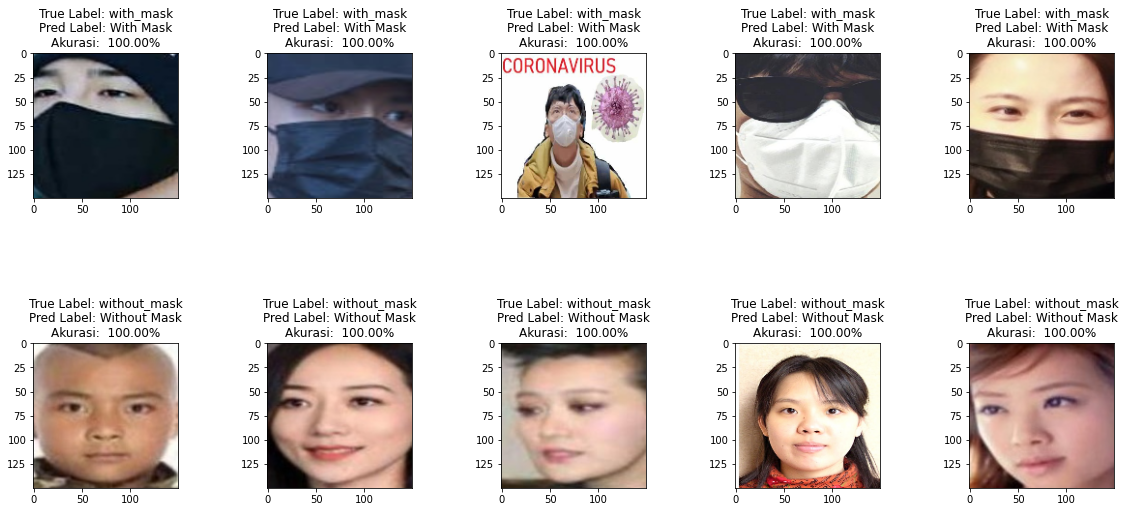

In [ ]:
nrows = 2
ncols = 5

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(with_without_mask_dir):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace=1, wspace=0.3)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (150,150))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    true_label = img_path.split(os.path.sep)[-2]
    pred_result = pred_img(img_path)
    pred_label = pred_result[0]
    confidence_percent = pred_result[1]

    plt.title(f"True Label: {true_label}\nPred Label: {pred_label}\nAkurasi: {confidence_percent: .2f}%")
    plt.imshow(img)

plt.show()